# QDM magnetic microscopy dataset of a speleothem from Morocco - MAT-file

This dataset features a high-resolution magnetic map of a stalagmite sample from Wintimdouine Cave, Morocco, created using Quantum Diamond Microscope (QDM) measurements at Harvard University. It examines the magnetic remanence of hematite and magnetite to provide insights into past geomagnetic field variations recorded in cave deposits.

**Source:** [10.6084/m9.figshare.22965200.v1](https://doi.org/10.6084/m9.figshare.22965200.v1) 

**License:** [CC0](https://creativecommons.org/publicdomain/zero/1.0/)


In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pooch
import magali as mg
import xarray as xr

## Download the data

Use [Pooch](https://github.com/fatiando/pooch) to download the original data file to our computer.

In [2]:
fname = pooch.retrieve(
    url="doi:10.6084/m9.figshare.22965200.v1/Bz_uc0.mat",
    known_hash="md5:268bd3af5e350188d239ff8bd0a88227"
)
print(f"size: {os.path.getsize(fname) / 1e6} Mb")

size: 10.238959 Mb


## Read the data

Use pandas to read the data.

In [3]:
data = mg.read_qdm_harvard(fname).bz
data

<xarray.DataArray 'bz' (y: 600, x: 960)> Size: 5MB
array([[ 352.40587477,   94.8913792 ,   41.61924299, ...,  470.18833933,
         129.20055397,   18.50120941],
       [ 525.04809649,  624.84659897,   53.45418   , ...,  450.42515609,
         240.12455308,  -73.61367693],
       [ 105.0939369 ,  638.76559489,  307.60736872, ...,  236.91326522,
         386.8498122 ,  -86.44215589],
       ...,
       [ -83.74367957,   32.98078244, -411.75073652, ...,  745.99373583,
        1036.20033954, -140.64317643],
       [ 171.17113661, -214.47801235,  159.23437984, ...,  124.58138395,
         258.54331931,  -90.3376945 ],
       [  80.60950354,  273.08367487,  118.23499313, ...,   -4.19572521,
         -53.55728012,    2.10335918]])
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
    z        (y, x) float64 5MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Attributes:
    long_name:  vertical magnetic field
    units:      nT

## Add metadata

Add metadata and proper field names to the grid before saving.

In [4]:
def minmax_round(grid, decimals):
    """
    Return the minimum and maximum values in the grid 
    rounded to *decimal* places.
    """
    vmin = np.round(grid.values.min(), decimals=decimals)
    vmax = np.round(grid.values.max(), decimals=decimals)
    return (vmin, vmax)

In [5]:
data.attrs = {
    "Conventions": "CF-1.8",
    "title": "QDM magnetic microscopy dataset of a speleothem from Morocco",
    "source": "Measured on a Quantum Diamond Microscope (QDM) at Harvard University, using a stalagmite from Wintimdouine cave (Morroco).",
    "license": "CC0 1.0 Universal",
    "references": "Carmo, Janine; Fu, Roger; Trindade, Ricardo; Piascik, Samuel (2023). QDM magnetic microscopy dataset of a speleothem from Morocco. figshare. Dataset. https://doi.org/10.6084/m9.figshare.22965200.v1",
    "long_name": "vertical magnetic field",
    "units": "nT",
    "actual_range": minmax_round(data, decimals=0),
}
data

<xarray.DataArray 'bz' (y: 600, x: 960)> Size: 5MB
array([[ 352.40587477,   94.8913792 ,   41.61924299, ...,  470.18833933,
         129.20055397,   18.50120941],
       [ 525.04809649,  624.84659897,   53.45418   , ...,  450.42515609,
         240.12455308,  -73.61367693],
       [ 105.0939369 ,  638.76559489,  307.60736872, ...,  236.91326522,
         386.8498122 ,  -86.44215589],
       ...,
       [ -83.74367957,   32.98078244, -411.75073652, ...,  745.99373583,
        1036.20033954, -140.64317643],
       [ 171.17113661, -214.47801235,  159.23437984, ...,  124.58138395,
         258.54331931,  -90.3376945 ],
       [  80.60950354,  273.08367487,  118.23499313, ...,   -4.19572521,
         -53.55728012,    2.10335918]])
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
    z        (y, x) float64 5MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Attributes:
    Conventions:   CF-1.8
    title:         QDM magnetic microscopy dataset of a speleothem from Morocco
    source:        Measured on a Quantum Diamond Microscope (QDM) at Harvard ...
    license:       CC0 1.0 Universal
    references:    Carmo, Janine; Fu, Roger; Trindade, Ricardo; Piascik, Samu...
    long_name:     vertical magnetic field
    units:         nT
    actual_range:  (np.float64(-236933.0), np.float64(301265.0))

## Plot the data 

Make a quick plot to make sure the data look OK. This plot will be used as a preview of the dataset.

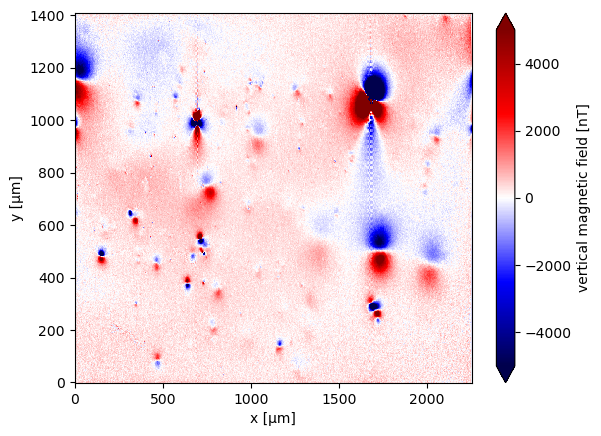

In [6]:
data.plot.pcolormesh(cmap="seismic", vmax=5000, vmin=-5000)
plt.savefig("preview.jpg")

## Export

Save the data to a file and calculate the size and MD5/SHA256 hashes.

In [7]:
output = "morroco-speleothem-qdm.nc"
data.to_netcdf(
    output, 
    encoding={
        "bz": { 
            'dtype': 'float32', 
            "zlib": True, 
        },
        "z": { 
            'dtype': 'float32', 
            "zlib": True, 
        }
    }
)
print(f"file: {output}")
print(f"size: {os.path.getsize(output) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(output, alg=alg)}")

file: morroco-speleothem-qdm.nc
size: 1.925098 Mb
md5:fc2f5eafaa06cf32961bedbc737c58f5
sha256:c2e1855b5870b5397593c6c8d177e7a983d4a0e0ea0494a57888bab6e58b0887


In [8]:
output_mat = "morroco-speleothem-qdm.mat"
shutil.copy(fname, output_mat)

print(f"file: {output_mat}")
print(f"size: {os.path.getsize(output_mat) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(output_mat, alg=alg)}")

file: morroco-speleothem-qdm.mat
size: 10.238959 Mb
md5:268bd3af5e350188d239ff8bd0a88227
sha256:2f2fbb4dfb645e27af09c76199ebcdd42c0fa137588072d3748eaf3be61fa0a6


## Read back the data and plot it

Verify that the output didn't corrupt anything.

In [9]:
data_reloaded = xr.load_dataarray(output)
data_reloaded

<xarray.DataArray 'bz' (y: 600, x: 960)> Size: 2MB
array([[ 352.40588  ,   94.89138  ,   41.619244 , ...,  470.18835  ,
         129.20056  ,   18.50121  ],
       [ 525.0481   ,  624.8466   ,   53.45418  , ...,  450.42517  ,
         240.12456  ,  -73.61368  ],
       [ 105.09393  ,  638.7656   ,  307.60736  , ...,  236.91327  ,
         386.84982  ,  -86.442154 ],
       ...,
       [ -83.74368  ,   32.98078  , -411.75073  , ...,  745.9937   ,
        1036.2003   , -140.64317  ],
       [ 171.17114  , -214.47801  ,  159.23438  , ...,  124.58138  ,
         258.5433   ,  -90.33769  ],
       [  80.609505 ,  273.08368  ,  118.23499  , ...,   -4.1957254,
         -53.55728  ,    2.1033592]], dtype=float32)
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
    z        (y, x) float32 2MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Attributes:
    Conventions:   CF-1.8
    title:         QDM magnetic microscopy dataset of a speleothem from Morocco
    source:        Measured on a Quantum Diamond Microscope (QDM) at Harvard ...
    license:       CC0 1.0 Universal
    references:    Carmo, Janine; Fu, Roger; Trindade, Ricardo; Piascik, Samu...
    long_name:     vertical magnetic field
    units:         nT
    actual_range:  [-236933.  301265.]

Make the figure again but don't save it to a file this time.

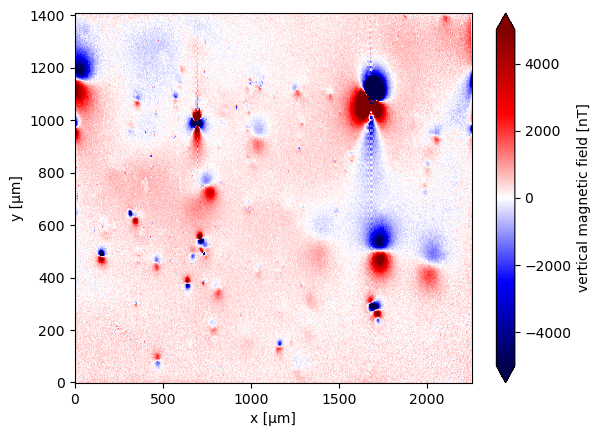

In [10]:
data_reloaded.plot.pcolormesh(cmap="seismic", vmax=5000, vmin=-5000)

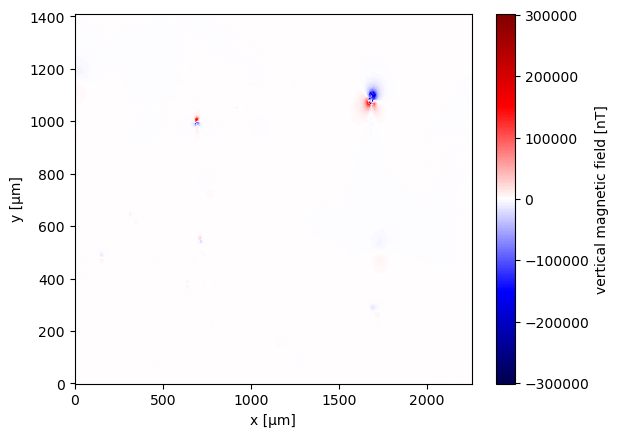

In [11]:
data_reloaded.plot.pcolormesh(cmap="seismic")

Check the .mat version as well.

In [12]:
data_reloaded = mg.read_qdm_harvard(output_mat)
data_reloaded

<xarray.Dataset> Size: 9MB
Dimensions:  (y: 600, x: 960)
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
    z        (y, x) float64 5MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Data variables:
    bz       (y, x) float64 5MB 352.4 94.89 41.62 288.4 ... -4.196 -53.56 2.103
Attributes:
    file_name:  morroco-speleothem-qdm.mat

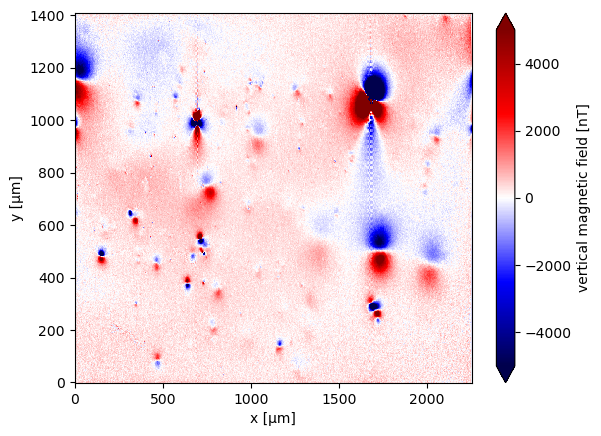

In [13]:
data_reloaded.bz.plot.pcolormesh(cmap="seismic", vmax=5000, vmin=-5000)